In [1]:
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

# Практическое задание №6

## 1. 

**Решите линейную систему:**

$\begin{bmatrix}
1 & 2 & 3\\
4 & 0 & 6\\
7 & 8 & 9
\end{bmatrix} \cdot X = \begin{bmatrix}12 \\2\\1\end{bmatrix}$

Решаем методом Крамера

$\Delta \begin{bmatrix}
1 & 2 & 3 \\
4 & 0 & 6 \\
7 & 8 & 9 \\
\end{bmatrix} = 
1 \cdot \begin{bmatrix}
0 & 6 \\
8 & 9 \\
\end{bmatrix} - 
2 \cdot \begin{bmatrix}
4 & 6 \\
7 & 9 \\
\end{bmatrix} +
3 \cdot \begin{bmatrix}
4 & 0 \\
7 & 8 \\
\end{bmatrix} =
1(0 \cdot 9 - 6 \cdot 8) - 2(4 \cdot 9 - 6 \cdot 7) + 3( 4 \cdot 8 - 0 \cdot 7) = -48 - 72 + 84 + 96 = 60
$ 

$\Delta _x \begin{bmatrix}
12 & 2 & 3 \\
2 & 0 & 6 \\
1 & 8 & 9 \\
\end{bmatrix} = 
12 \cdot \begin{bmatrix}
0 & 6 \\
8 & 9 \\
\end{bmatrix} - 
2 \cdot \begin{bmatrix}
2 & 6 \\
1 & 9 \\
\end{bmatrix} +
3 \cdot \begin{bmatrix}
2 & 0 \\
1 & 8 \\
\end{bmatrix} =
12(0 \cdot 9 - 6 \cdot 8) - 2(2 \cdot 9 - 6 \cdot 1) + 3( 2 \cdot 8 - 0 \cdot 1) = 0 - 576 - 36 + 12 + 48 = -552
$ 

$\Delta _y \begin{bmatrix}
1 & 12 & 3 \\
4 & 2 & 6 \\
7 & 1 & 9 \\
\end{bmatrix} = 
1 \cdot \begin{bmatrix}
2 & 6 \\
1 & 9 \\
\end{bmatrix} - 
12 \cdot \begin{bmatrix}
4 & 6 \\
7 & 9 \\
\end{bmatrix} +
3 \cdot \begin{bmatrix}
4 & 2 \\
7 & 1 \\
\end{bmatrix} =
1(2 \cdot 9 - 6 \cdot 1) - 12(4 \cdot 9 - 6 \cdot 7) + 3( 4 \cdot 1 - 2 \cdot 7) = 18 - 6 - 432 + 504 + 12 - 42 = 54
$ 

$\Delta _z \begin{bmatrix}
1 & 2 & 12 \\
4 & 0 & 2 \\
7 & 8 & 1 \\
\end{bmatrix} = 
1 \cdot \begin{bmatrix}
0 & 2 \\
8 & 1 \\
\end{bmatrix} - 
2 \cdot \begin{bmatrix}
4 & 2 \\
7 & 1 \\
\end{bmatrix} +
12 \cdot \begin{bmatrix}
4 & 0 \\
7 & 8 \\
\end{bmatrix} =
1(0 \cdot 1 - 2 \cdot 8) - 2(4 \cdot 1 - 2 \cdot 7) + 12( 4 \cdot 8 - 0 \cdot 7) = -16 - 8 + 28 + 384 = 388
$ 

$x = \frac{\Delta _x}{\Delta} = \frac{-552}{60} = -\frac{46 \cdot 12}{5 \cdot 12} = - \frac{46}{5} = -9.2$

$y = \frac{\Delta _y}{\Delta} = \frac{54}{60} = \frac{9 \cdot 6}{10 \cdot 6} = \frac{9}{10} = 0.9$

$z = \frac{\Delta _z}{\Delta} = \frac{388}{60} = \frac{97 \cdot 4}{15 \cdot 4} = \frac{97}{18} = \frac{6 \cdot 15 + 7}{15} = 6 \frac{7}{15} = 6.46(6)$

проверим на Python:

In [2]:
A, B = np.array([[1, 2, 3], [4, 0, 6], [7, 8, 9]]), np.array([12, 2, 1], float)
X = np.linalg.solve(A, B)
print(f'A =\n{A}\n\nB = {B}\n\nX = {X}')

A =
[[1 2 3]
 [4 0 6]
 [7 8 9]]

B = [12.  2.  1.]

X = [-9.2         0.9         6.46666667]


## 2. 

**Найдите псевдорешение:**

$x + 2y – z = 1$

$3x – 4y = 7$

$8x – 5y + 2z = 12$

$2x – 5z = 7$

$11x +4y – 7z = 15$

это переопределённая система, так как неизвестных 3, а уровнений больше, чем неизвестных

Рушаем сразу на Python, без расписулек:

In [3]:
A = np.array([[1, 2, -1], [3, -4, 0], [8, -5, 2], [2, 0, -5], [11, 4, -7]])
B = np.array([1, 7, 12, 7, 15])
np.linalg.lstsq(A, B, rcond=None)

(array([ 1.13919353, -0.90498444, -0.9009803 ]),
 array([0.71523211]),
 3,
 array([15.2817306 ,  9.59852942,  3.65197794]))

## 3. 

**Сколько решений имеет линейная система:**

$\begin{bmatrix}
1 & 2 & 3\\
4 & 5 & 6\\
7 & 8 & 9
\end{bmatrix} \cdot X = \begin{bmatrix}12 \\2\\1\end{bmatrix}$

In [4]:
A, B = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]]), np.array([[12, 2, 1]], float)
C = np.concatenate((A,B.T), axis=1)
print(f'матрица A =\n{A}\n\nвектор B = {B}\n\nрашриренная матрица С =\n{C}')
print(f'\nранг матрицы A = {np.linalg.matrix_rank(A)}\nранг матрицы C = {np.linalg.matrix_rank(C)}')

матрица A =
[[1 2 3]
 [4 5 6]
 [7 8 9]]

вектор B = [[12.  2.  1.]]

рашриренная матрица С =
[[ 1.  2.  3. 12.]
 [ 4.  5.  6.  2.]
 [ 7.  8.  9.  1.]]

ранг матрицы A = 2
ранг матрицы C = 3


ранги матриц A и C не совпадают $\Rightarrow$ решения нет

пусть верктор B = (2, 5, 8), тогда:

In [5]:
C_ = np.concatenate((A, np.array([[2, 5, 8]], float).T), axis=1)
print(f'матрица C_ =\n{C_}\n\nеё ранг = {np.linalg.matrix_rank(C_)}')

матрица C_ =
[[1. 2. 3. 2.]
 [4. 5. 6. 5.]
 [7. 8. 9. 8.]]

её ранг = 2


ранги матриц A и C_ совпадают $\Rightarrow$ решаем

$
\begin{cases}
x_1 + 2x_2 + 3x_3 = 2\\ 
-3x_2 - 6x_3 = -3
\end{cases} \sim
\begin{cases}
x_1 + 2x_2 + 3x_3 = 2\\ 
x_2 = 1 - 2x_3
\end{cases} \sim
\begin{cases}
x_1 = 2 - 2x_2 - 3x_3\\ 
x_2 = 1 - 2x_3
\end{cases} \sim
\begin{cases}
x_1 = 2 - 2(1 - 2x_3) - 3x_3\\ 
x_2 = 1 - 2x_3
\end{cases} \sim
\begin{cases}
x_1 = x_3\\ 
x_2 = 1 - 2x_3
\end{cases}
$

$\Rightarrow X =
\begin{pmatrix}
  x_3 \\
  1 - 2x_3 \\
  x_3
\end{pmatrix}$

## 4. 

**Вычислите LU-разложение матрицы:**

$\begin{bmatrix}
1 & 2 & 3\\
2 & 16 & 21\\
4 & 28 & 73
\end{bmatrix}$

LU-разложение производится по формуле $P^T \cdot A = L \cdot U$. По этому методу мы представляем произведение матриц $P$ и $A$ в виде произведения двух матриц $L$ и $U$, где:

$L$ - нижняя треугольная матрица

$U$ - верхняя треугольная матрица

$P$ - матрица перестановок

по условию $\Delta A$ должен быть $\neq 0$

вычисляем LU разложение при помощи метода linalg.lu библиотеки scipy

In [6]:
A = np.array([[1, 2, 3], [2, 16, 21], [4, 28, 73]])
P, L, U = linalg.lu(A)
print(f'матрица A =\n{A}\n\nеё определитель = {round(np.linalg.det(A))}\n\nP =\n{P}\n\nL =\n{L}\n\nU=\n{U}')

матрица A =
[[ 1  2  3]
 [ 2 16 21]
 [ 4 28 73]]

её определитель = 432

P =
[[0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]]

L =
[[ 1.    0.    0.  ]
 [ 0.25  1.    0.  ]
 [ 0.5  -0.4   1.  ]]

U=
[[  4.    28.    73.  ]
 [  0.    -5.   -15.25]
 [  0.     0.   -21.6 ]]


Проверим:

In [7]:
print(f'P.T*A =\n{np.dot(P.T, A)}\n\nL*U =\n{np.dot(L, U)}\n\nсравним: {np.array_equal(np.dot(P.T, A), np.dot(L, U))}')

P.T*A =
[[ 4. 28. 73.]
 [ 1.  2.  3.]
 [ 2. 16. 21.]]

L*U =
[[ 4. 28. 73.]
 [ 1.  2.  3.]
 [ 2. 16. 21.]]

сравним: True


## 5. 

**Найдите нормальное псевдорешение недоопределенной системы**

$
\begin{cases}
x - 2y - z = 1\\ 
8x - 5y + 2z = 12
\end{cases}$

**Для этого определите функцию Q(x,y,z), равную норме решения, и найдите ее минимум.**

недоопределённая - неизвестных больше, чем уравнений - решений бесконечное количество. Выражаем две переменных, строим график

$
\begin{cases}
x - 2y - z = 1\\ 
8x - 5y + 2z = 12
\end{cases} \sim
\begin{cases}
z = x + 2y - 1\\ 
8x - 5y + 2(x + 2y - 1) = 12
\end{cases} \sim
\begin{cases}
z = x + 2y - 1\\ 
8x - 5y + 2x + 4y - 2 = 12
\end{cases} \sim
\begin{cases}
z = x + 2y - 1\\ 
10x - y = 14
\end{cases} \sim
\begin{cases}
z = x + 2y - 1\\ 
y = 10x - 14
\end{cases}
$

найдём нормальное псевдорешение с помошью модуля linalg.lstsq()

In [8]:
A, B = np.array([[1, 2, -1], [8, -5, 2]]), np.array([1, 12])
np.linalg.lstsq(A, B, rcond=None)

(array([ 1.38191882, -0.18081181,  0.0202952 ]),
 array([], dtype=float64),
 2,
 array([9.65316119, 2.41173777]))

найдём его же с помощью функции Q(x,y,z), это решение с минимальной нормой. Если нарисуем на графике точку, найденную с помощью linalg.lstsq(), то она попадёт аккуратно в самый низ параболы, о как

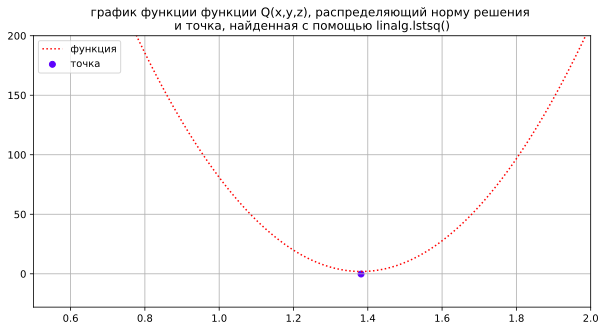

In [9]:
def Q(x, y, z):
    return(x**2 + y**2 + z**2)
plt.figure(figsize=(10, 5))
x = np.linspace(0, 3, 200)
plt.plot(x, Q(x, 10*x-14, 21 * x - 29), c='r', linestyle=':', label='функция')
plt.scatter(1.38191882, -0.18081181, color='#5e03fc', label='точка')
plt.xlim([0.5, 2])
plt.ylim([-28, 200])
plt.grid()
plt.legend()
plt.title('график функции функции Q(x,y,z), распределяющий норму решения \nи точка, найденная с помощью linalg.lstsq()');

## 6. 

**Найдите одно из псевдорешений вырожденной системы:**

$\begin{bmatrix}
1 & 2 & 3\\
4 & 5 & 6\\
7 & 8 & 9
\end{bmatrix} \cdot X = \begin{bmatrix}2 \\5\\11\end{bmatrix}$

**Попробуйте также отыскать и нормальное псевдорешение.**

In [10]:
A, B = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]]), np.array([2, 5, 11])
C = np.array([[1, 2, 3, 2], [4, 5, 6, 5], [7, 8, 9, 11]])
print(f'матрица A =\n{A}\nеё ранг = {np.linalg.matrix_rank(A)}\n\nвектор B = {B}\n')
print(f'расширенная матрица C =\n{C}\nеё ранг = {np.linalg.matrix_rank(C)}')

матрица A =
[[1 2 3]
 [4 5 6]
 [7 8 9]]
её ранг = 2

вектор B = [ 2  5 11]

расширенная матрица C =
[[ 1  2  3  2]
 [ 4  5  6  5]
 [ 7  8  9 11]]
её ранг = 3


$R(A) \neq R(C) \Rightarrow$ система несовместная и решений у неё нет, а значит будем искать пседорешение с помощью QR-разложения

In [11]:
Q, R = np.linalg.qr(A)

print(f'матрица Q =\n{Q}\n\nматрица R =\n{R}')

матрица Q =
[[-0.12309149  0.90453403  0.40824829]
 [-0.49236596  0.30151134 -0.81649658]
 [-0.86164044 -0.30151134  0.40824829]]

матрица R =
[[-8.12403840e+00 -9.60113630e+00 -1.10782342e+01]
 [ 0.00000000e+00  9.04534034e-01  1.80906807e+00]
 [ 0.00000000e+00  0.00000000e+00 -1.11164740e-15]]


выделим срезами R1 и B1 и получим решение системы

In [12]:
R1, B1 = R[:2, :2], np.dot(np.transpose(Q), B)[:2]
print(f'R1 = \n{R1}\n\nB1 = {B1}')

R1 = 
[[-8.1240384  -9.6011363 ]
 [ 0.          0.90453403]]

B1 = [-1.21860576e+01  8.54871729e-15]


вырезанные фрагменты позволяют нам определить псевдорешение, при условии, что 3-я координата вектора будет = 0

In [13]:
X1 = np.linalg.solve(R1, B1)
X = np.append(X1, 0)
print(f'вектор X = {X}\n\nнорма псевдорешения = {np.round(np.linalg.norm(X), 4)}\n\nнорма невязки СЛАУ = {np.round(np.linalg.norm(np.dot(A, X)- B), 4)}')

вектор X = [1.50000000e+00 9.45096256e-15 0.00000000e+00]

норма псевдорешения = 1.5

норма невязки СЛАУ = 1.2247


при помощи linalg.lstqs() получим нормальное псевдорешение

In [14]:
np.linalg.lstsq(A, B, rcond=None)

(array([ 1.25,  0.5 , -0.25]),
 array([], dtype=float64),
 2,
 array([1.68481034e+01, 1.06836951e+00, 3.33475287e-16]))

Для полученного вектора мы можем так же посчитать и норму и норму невязки:

In [15]:
np.round(np.linalg.norm([ 1.25,  0.5 , -0.25]), 4), np.round(np.linalg.norm(np.dot(A, [ 1.25,  0.5 , -0.25]) - B), 4)

(1.3693, 1.2247)